# CS412 - Machine Learning - 2023
## Homework 1
100 pts

## Software: 

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

When you search for KNeighborsClassifier for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name HW1-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the **Share** button on top right).

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you click the Connect button from upper right.


In [ ]:
import random
import numpy as np

random.seed(412)
np.random.seed(412)

## 2) Load training dataset

*  Read MNIST dataset from Keras library.



In [ ]:
# this cell can be skipped at the running time
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

##3) Reshape the MNIST data

  In order to use images as input data for the sklearn k-NN classifier, the 2D image arrays need to be reshaped into a 1D arrays (in other words, a feature vector).

In [ ]:
print('Before reshaping: ', X_train.shape, X_test.shape)

Before reshaping:  (60000, 28, 28) (10000, 28, 28)


In [ ]:
N_train, height, width = X_train.shape

X_train = np.reshape(X_train, (N_train, height*width)) # from array of shape N_train x 28 x 28 ---> N_train x 784 (Note: 28*28 = 784)
X_test = np.reshape(X_test, (len(X_test), height*width)) # from array of shape N_test x 28 x 28 ---> N_test x 784 

In [ ]:
print('After reshaping: ', X_train.shape, X_test.shape)

After reshaping:  (60000, 784) (10000, 784)


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data
X_train_shuffled, Y_train_shuffled = shuffle(X_train, Y_train)

# Split %80 train - 20% val
X_training, X_validation = np.split(X_train_shuffled, [int(len(X_train_shuffled) * 0.8)])
Y_training, Y_validation = np.split(Y_train_shuffled, [int(len(Y_train_shuffled) * 0.8)])

print("%80 reserved for training:")
print(" Training set X:", X_training.shape)
print(" Training set Y:", Y_training.shape)
print("%20 reserved for validation:")
print(" Validation set X:", X_validation.shape)
print(" Validation set Y:", Y_validation.shape)

%80 reserved for training:
 Training set X: (48000, 784)
 Training set Y: (48000,)
%20 reserved for validation:
 Validation set X: (12000, 784)
 Validation set Y: (12000,)


##5) Train k-NN  classifier on development data and do model selection using the validation data


* Train a k-NN classifier (use the values specified in the homework PDF file, do not try other values) with the rest of the parameters set to default. 

* The aim in this homework is not necessarily obtaining the best performance, but to establish the ML pipeline (train a few models, select based on validation set, test, report).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9, 11, 13]   # <--- Fill the list with the values for n_neighbors

best_acc = -1 
best_k = None
val_accs = [] 
for k in k_values:
# 1) initialize a k-NN classifier with n_neighbors parameter set to k
    classifier = KNeighborsClassifier(n_neighbors=k)
# 2) train the classifier using training set
    classifier.fit(X_training, Y_training)
# 3) get the predictions of the classifier on the validation set
    Y_prediction = classifier.predict(X_validation)
# 4) compute the accuracy of the predictions on the validation set and append it to val_accs list
    score = accuracy_score(Y_validation, Y_prediction)
    print('Validation accuracy for k =', k, ':', score)
    val_accs.append(score)
# if validation accuracy is better than best_acc, update best_acc and best_k
    if score > best_acc:
        best_acc = score
        best_k = k

print('Best validation accuracy (', best_acc, ') is achieved with k =', best_k)

Validation accuracy for k = 1 : 0.9721666666666666
Validation accuracy for k = 3 : 0.9699166666666666
Validation accuracy for k = 5 : 0.96925
Validation accuracy for k = 7 : 0.9684166666666667
Validation accuracy for k = 9 : 0.9668333333333333
Validation accuracy for k = 11 : 0.9655833333333333
Validation accuracy for k = 13 : 0.9639166666666666
Best validation accuracy ( 0.9721666666666666 ) is achieved with k = 1


## 6) Plot the obtained validation accuracies versus k values 

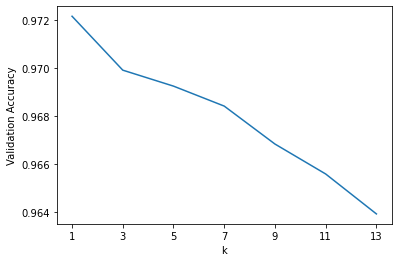

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, val_accs)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

## 7) Test your classifier on test set

- Now that you have the best value for the ***n_neighbors*** parameter, train a model **with best parameters that you have found according to your validation results**. But now, train the model by combining the training and validation sets. Then report the accuracy on the test set. 

In [ ]:
# 1) initialize a k-NN classifier with n_neighbors parameter set to best_k
finalClassifier = KNeighborsClassifier(n_neighbors=best_k)
# 2) combine the training and validation sets (you may want to look up numpy.concatenate function for this)
X_combined = np.concatenate((X_training, X_validation), axis=0)
Y_combined = np.concatenate((Y_training, Y_validation), axis=0)
# 3) train the classifier using this set
finalClassifier.fit(X_combined, Y_combined)
# 4) get the predictions of the classifier on the test set 
Y_prediction = finalClassifier.predict(X_test)
# 5) compute the accuracy of the predictions on the test set
score = accuracy_score(Y_test, Y_prediction)
print('Test accuracy for k =', best_k, ':', score)

# Report your result

Test accuracy for k = 1 : 0.9691


##8) Report your results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what kNN is or what MNIST is, assuming they are known to people in your research area). 

**Must include statements such as those below:**
**(Remove the text in parentheses, below, and include your own report)**

( Include the problem definition: 1-2 lines )

 (Talk about train/val/test sets, size and how split. )

 (In here you would also talk about feature extraction or preprocessing - but here we dont do any.)

 ( Give the validation accuracies for different approach and meta-parameters tried **in a table** and state which one you selected as your model.)

( State  what your test results are with the chosen approach and meta-parameters: e.g. "We have obtained the best results on the validation set with the ..........approach using a value of ...... for .... parameter. The result of this model on the test data is ..... % accuracy."" 
 
As long as you have the essential info summarizing what you have done and your results, exact format or extra content (like what you may find interesting) does not matter. You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.

